Import libs

In [1]:

import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Load the data into data frame 

In [2]:
df = pd.read_csv('Players Database.csv')

# Data Exploring:

see the frist 5 row in the dataset


In [ ]:
df.head()

,Pos,Age,Matches Played,Starts,mins,90s,Gls,Ast,Xg
0,0,31,30,30,2650.0,29.4,2.0,0.0,0.05
1,1,28,30,29,2616.0,29.1,9.0,12.0,0.16
2,2,34,29,29,2610.0,29.0,0.0,0.0,0.00
3,1,28,27,27,2387.0,26.5,4.0,1.0,0.07
4,0,20,30,26,2327.0,25.9,11.0,11.0,0.34


Data shape 

In [ ]:
df.shape

(29, 9)

see if there is null valuse in every colum


In [ ]:
df.isna().sum()

Pos               0
Age               0
Matches Played    0
Starts            0
mins              5
90s               5
Gls               5
Ast               5
Xg                5
dtype: int64

see if there daplicated values in every colum


In [ ]:
for i in df.columns:
    number_of_dap = df[i].duplicated().sum()
    print(f"{i}: {number_of_dap}")

Pos: 25
Age: 13
Matches Played: 9
Starts : 11
mins: 4
90s: 5
Gls: 19
Ast: 18
Xg: 11


___


# Data Handling:

drop the null values


In [ ]:
f_df = df.dropna()
f_df.shape

(24, 9)

Rename the data colums


In [ ]:
f_df.columns = ['Pos', 'Age', 'Matches_Played', 'Starts', 'Minutes', '90s', 'Goals', 'Assists', 'xG']

Encode


In [ ]:
f_df['Pos'] = f_df['Pos'].astype('category').cat.codes

C:\Users\apgso\AppData\Local\Temp\ipykernel_16232\3183122102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['Pos'] = f_df['Pos'].astype('category').cat.codes


Data division:

In [10]:
x = f_df[['Pos', 'Age', 'Matches_Played', 'Starts', 'Minutes', '90s', 'Goals', 'Assists']]
y = f_df['xG']

___

# Modeling

Model fitting:

In [11]:
model = RandomForestRegressor(random_state=59)
model.fit(x, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model predictoin:

In [12]:
y_pred = model.predict(x)

Calculate the R2 Score & MSE :

In [13]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.0035783070833333382
R² Score: 0.9331918511819675


# Model & Data visualization

Avrage of age Boxplot

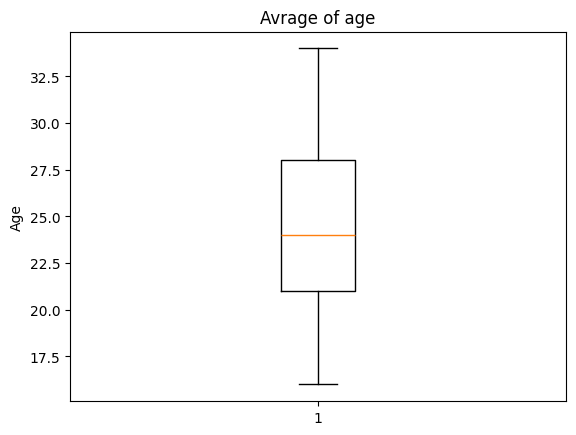

In [14]:
plt.boxplot(df[['Age']])
plt.title("Avrage of age")
plt.ylabel("Age")
plt.show()

liner plot describe the difference betwwen Actual and Predicted target values

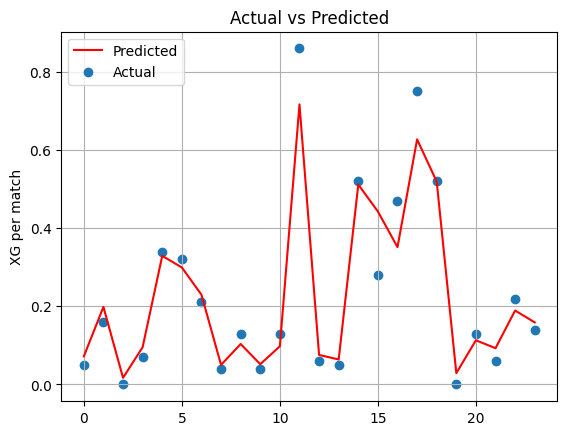

In [15]:
plt.plot(x.index , y_pred , color = "Red" , label = "Predicted" )
plt.grid()
plt.scatter(x.index , y , label="Actual")
plt.title("Actual vs Predicted")
plt.legend(loc="upper left")
plt.ylabel("XG per match")
plt.show()

___
___

#  ( Summary ) 
______________________________________________________________________________________________________________________________

# 1 - DATA

        'Pos' : player position that he plays in. 
        'Age' : Player age 
        'Matches_Played' : How many matches every player played 
        'Starts' : How many matches every player started
        'Minutes' : How much Minutes every player played 
        '90s' : How many matches every player been 90 mins in it 
        'Goals' : How many goals every player scored
        'Assists' : How many assists every player made
        'xG' : What is player's XG


    29 rwo  X  9 colum | shape: (29, 9)
    25 Null values :-
        mins              5
        90s               5
        Gls               5
        Ast               5
        Xg                5

    Data shape after drop the nnull values is : (24, 9)

_____________________________________________________________________________________________________________________


# 2 - MODEL 

        -type of the model is (Random Forest Regressor) with (random state = 59)
        -model has 8 features  (Pos , Age , Matches_Played , Starts , Minutes , 90s , Goals , Assists)
        -Target value is the XG 
        

_________________________________________________________________________________________________________________________


# 3 - Performance
        
        -R2 score :  93%

        -Mean Squared Error (MSE) : 0.0035
    


            


            
